In [1]:
import pandas as pd
import optbinning as ob
import sklearn as sl
from optbinning import OptimalBinning, BinningProcess
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import ydata_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from ydata_profiling import ProfileReport
import category_encoders as ce
import seaborn as sns

*Reading the main dataset*

In [4]:
#data = pd.read_csv('D:/my_ML/diploma_polytech/data/raw/vehicle_ins_data_1.csv', sep = ";",index_col= False)
data = pd.read_csv('D:/my_ML/diploma_polytech/data/raw/train_new_ds.csv', sep = ",",index_col= False)
print(data)


      policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       ID00001       0.515874        0.05             0.644231           C1   
1       ID00002       0.672619        0.02             0.375000           C2   
2       ID00003       0.841110        0.02             0.384615           C3   
3       ID00004       0.900277        0.11             0.432692           C4   
4       ID00005       0.596403        0.11             0.634615           C5   
...         ...            ...         ...                  ...          ...   
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

       population_density  make segment

*Reading alternative dataset*

In [3]:
# data = pd.read_csv('D:/maga_poly/диплом/diploma_polytech/data/raw/motor_data1.csv', index_col= False)
# print(data)

*Data Analysis Main Dataset*

In [5]:
# 1. Первый взгляд на данные
print("Размер датасета:", data.shape)
print("\nПервые 5 строк:")
display(data.head())

print("\nИнформация о данных:")
data.info()

print("\nОсновные статистические характеристики числовых полей:")
display(data.describe())

Размер датасета: (58592, 44)

Первые 5 строк:


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-n

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [6]:
# 2. Анализ пропущенных значений
missing_values = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100

missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent
}).sort_values('Процент пропусков', ascending=False)

print("Анализ пропущенных значений:")
display(missing_df[missing_df['Количество пропусков'] > 0])


Анализ пропущенных значений:


,Количество пропусков,Процент пропусков


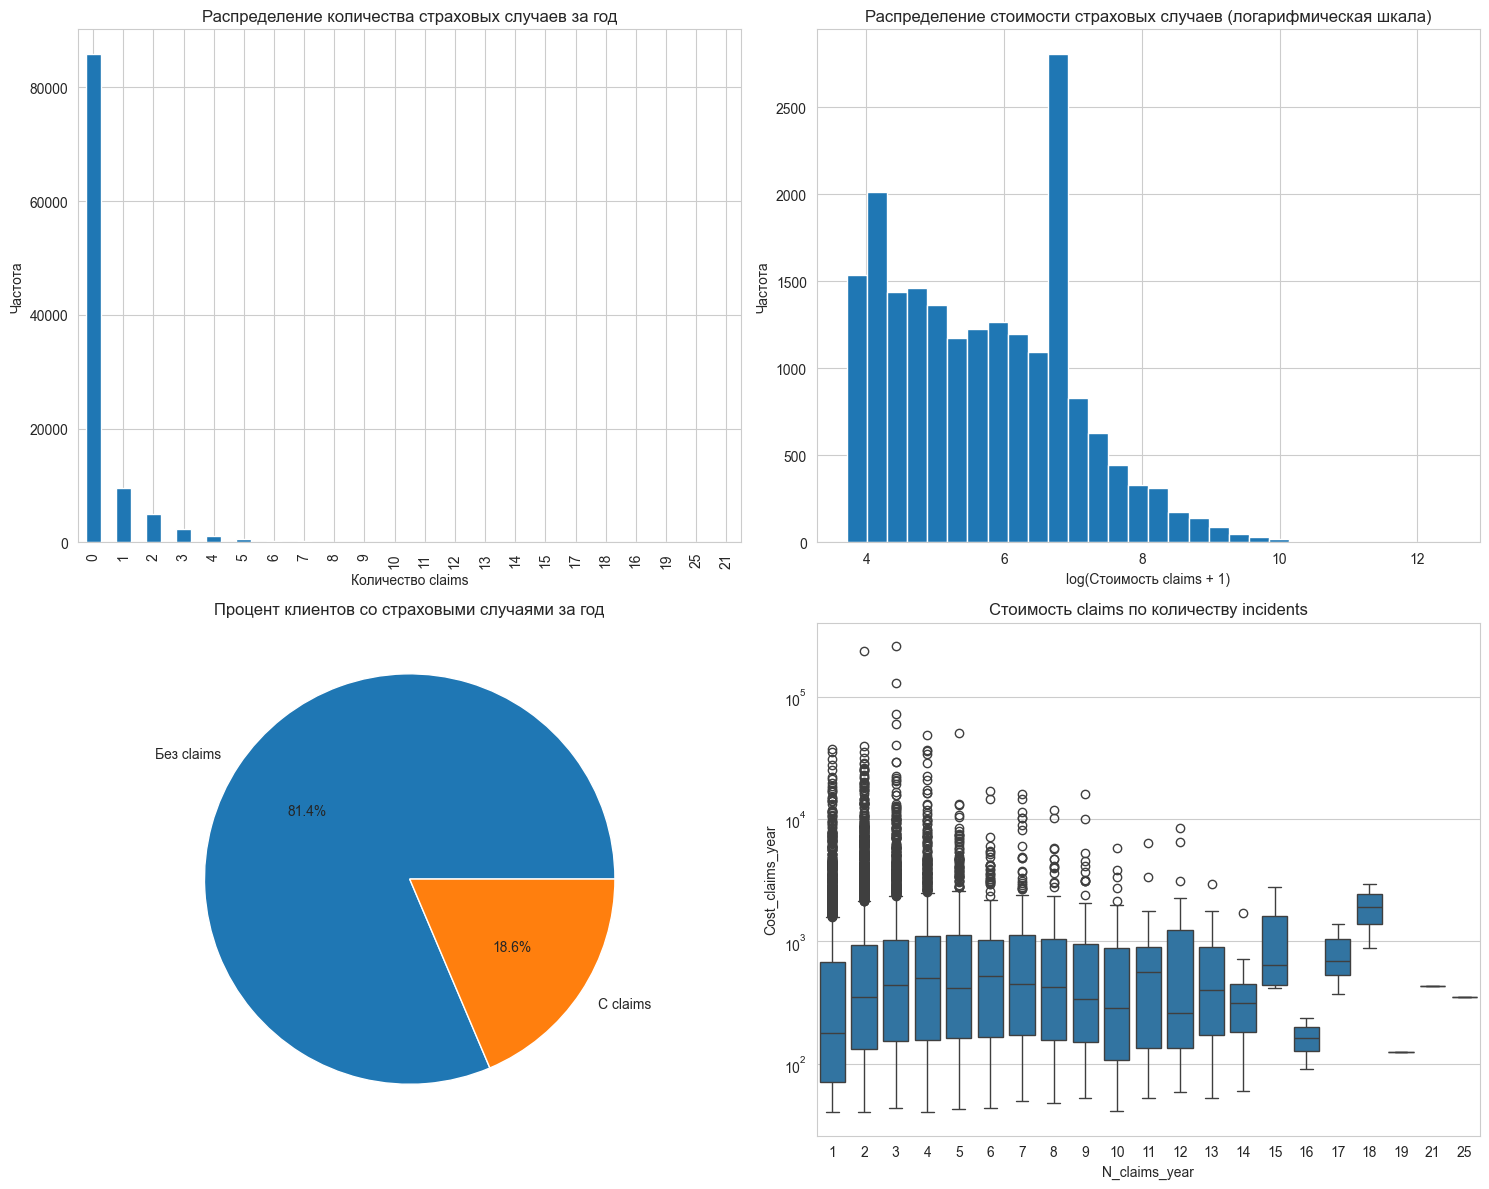

In [4]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
# 3. Анализ целевых переменных
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# Распределение количества страховых случаев за год
data['N_claims_year'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Распределение количества страховых случаев за год')
axes[0, 0].set_xlabel('Количество claims')
axes[0, 0].set_ylabel('Частота')

# Распределение стоимости страховых случаев за год (логарифмическая шкала для лучшей визуализации)
cost_claims = data[data['Cost_claims_year'] > 0]['Cost_claims_year']
axes[0, 1].hist(np.log1p(cost_claims), bins=30)
axes[0, 1].set_title('Распределение стоимости страховых случаев (логарифмическая шкала)')
axes[0, 1].set_xlabel('log(Стоимость claims + 1)')
axes[0, 1].set_ylabel('Частота')

# Соотношение клиентов с claims и без
claim_flag = data['N_claims_year'] > 0
claim_percentage = claim_flag.value_counts(normalize=True) * 100
axes[1, 0].pie(claim_percentage, labels=['Без claims', 'С claims'], autopct='%1.1f%%')
axes[1, 0].set_title('Процент клиентов со страховыми случаями за год')

# Boxplot стоимости claims по количеству incidents
sns.boxplot(x='N_claims_year', y='Cost_claims_year', data=data[data['N_claims_year'] > 0], ax=axes[1, 1])
axes[1, 1].set_title('Стоимость claims по количеству incidents')
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


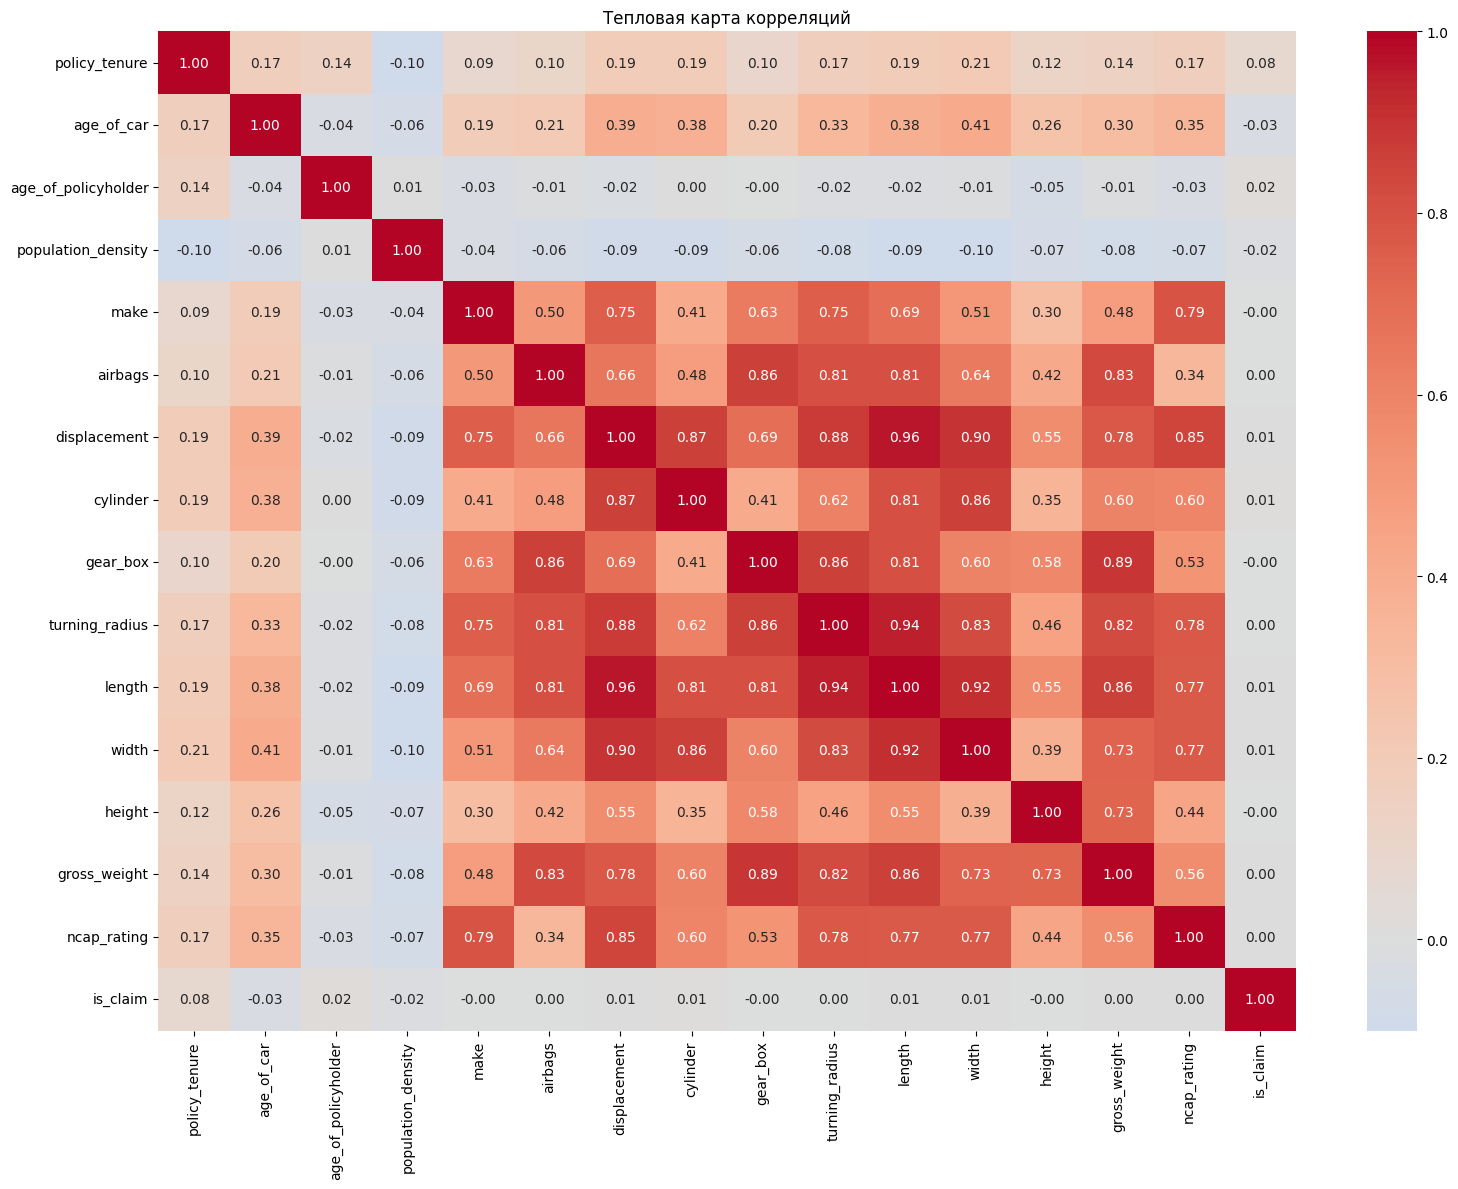

In [7]:
# Создаем корреляционную матрицу только для численных признаков
numerical_df = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

# Визуализируем тепловую карту корреляций
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций')
plt.tight_layout()
plt.show()

Средние значения признаков по группам (с claims и без):


Has_claim,0,1
ID,26151.059784,26797.021378
Seniority,6.894086,5.833045
Policies_in_force,1.414788,1.634328
Max_policies,1.798287,2.007533
Max_products,1.068014,1.056347
Lapse,0.238147,0.150514
Payment,0.293287,0.432404
Premium,308.762478,347.071319
Cost_claims_year,0.000000,825.040281
N_claims_year,0.000000,2.120635


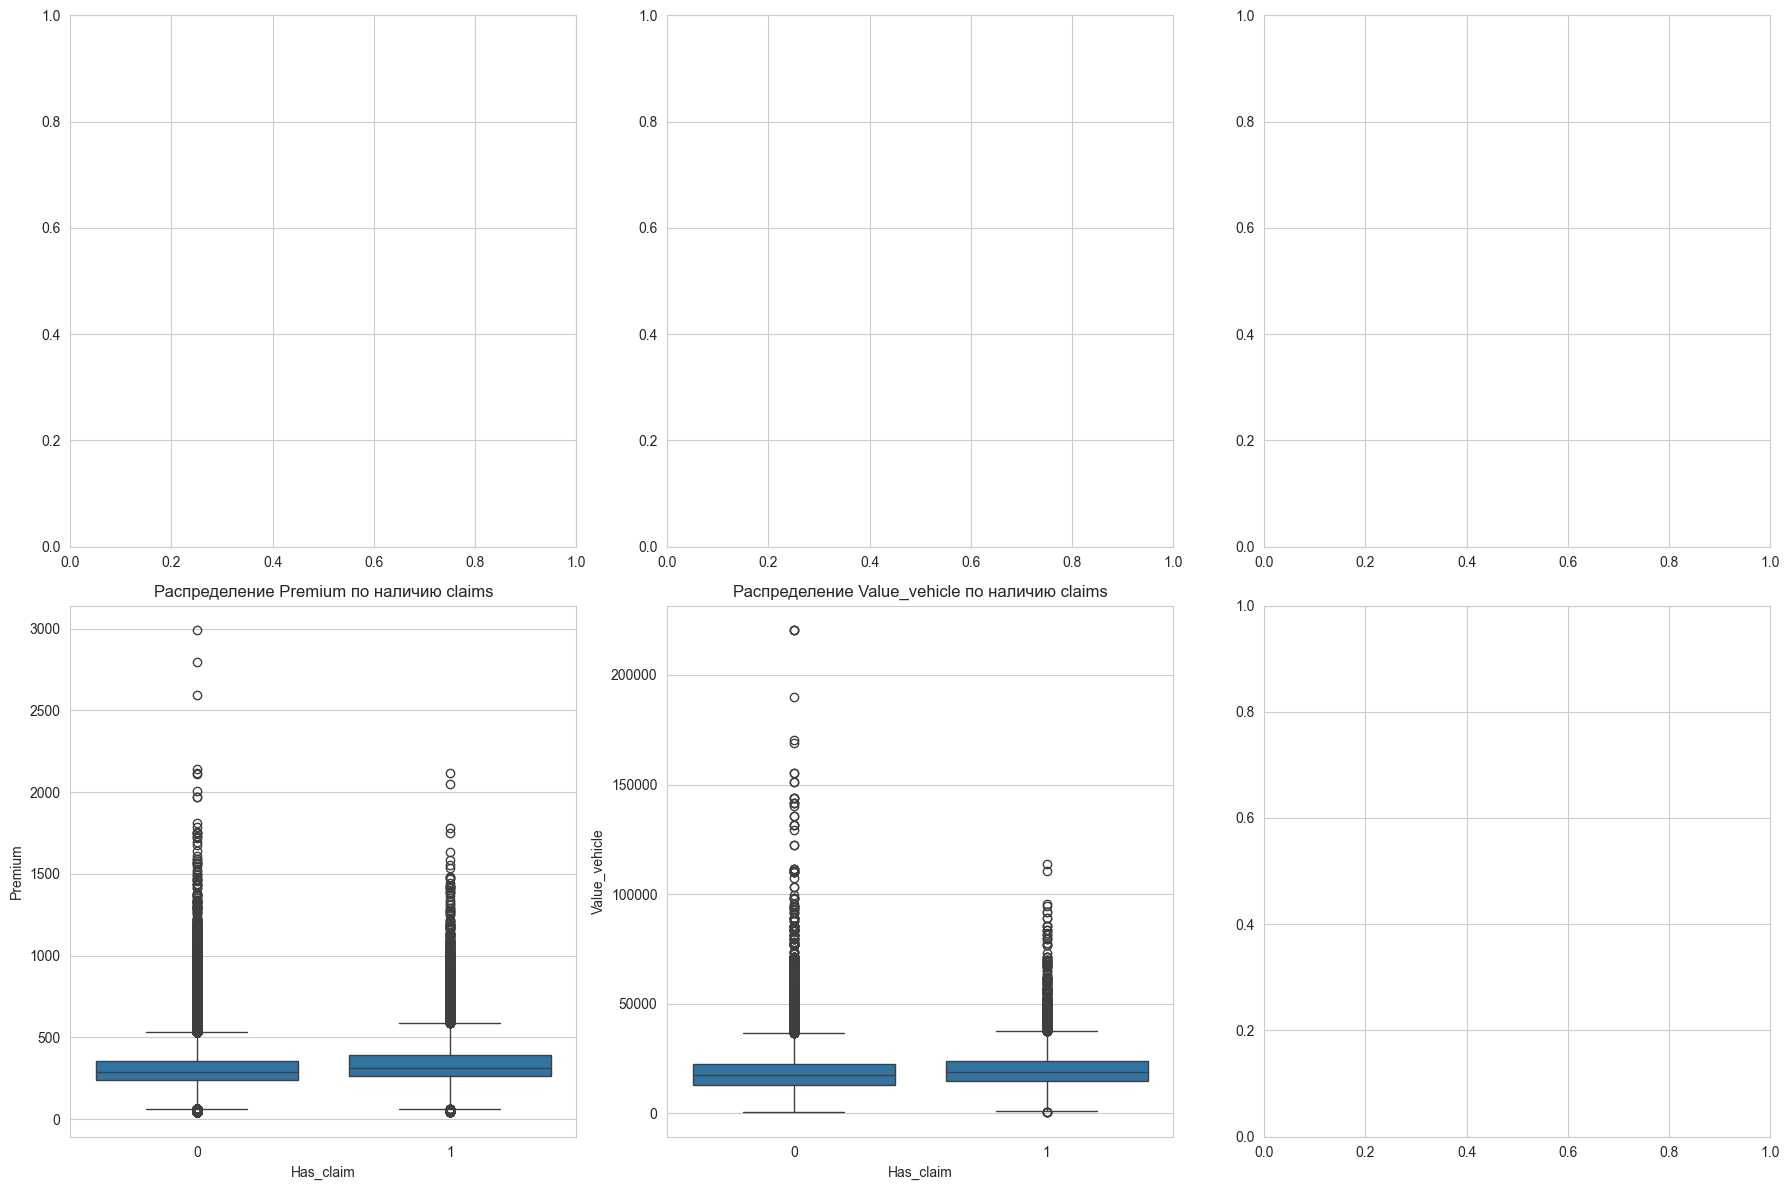

In [6]:
# 8. Анализ связи признаков с целевой переменной
# Создадим бинарную целевую переменную - был ли хотя бы один страховой случай
data['Has_claim'] = (data['N_claims_year'] > 0).astype(int)

# Посмотрим на средние значения признаков для групп с claims и без
claim_summary = data.groupby('Has_claim').mean(numeric_only=True)
print("Средние значения признаков по группам (с claims и без):")
display(claim_summary.T)

# Анализ нескольких ключевых признаков
key_features = ['Age', 'Driving_experience', 'Vehicle_age', 'Premium', 'Value_vehicle']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    if feature in data.columns:
        sns.boxplot(x='Has_claim', y=feature, data=data, ax=axes[i])
        axes[i].set_title(f'Распределение {feature} по наличию claims')

plt.tight_layout()
plt.show()